# Neural Networks

<img src = "images/02-nn.png" width="200">

### Loading MNIST data

The Keras deep learning library provides a convenience method for loading the MNIST dataset.

The dataset is downloaded automatically the first time this function is called and is stored in your home directory in ~/.keras/datasets/mnist.pkl.gz as a 15MB file.

This is very handy for developing and testing deep learning models.

To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first 4 images in the training dataset.

In [22]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

You can see that downloading and loading the MNIST dataset is as easy as calling the mnist.load_data() function. Running the above example, you should see the image below.

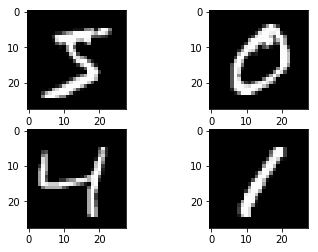

In [23]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [24]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [25]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [26]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of Training data: {}".format(X_train.shape))
print("Shape of Test data: {}".format(X_test.shape))

Shape of Training data: (60000, 28, 28)
Shape of Test data: (10000, 28, 28)


The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway.

In [27]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [28]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [29]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

y_train[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

We are now ready to create our simple neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

In [33]:
# define baseline model

from keras.optimizers import Adam, Adagrad
optimizer = Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1)
# optimizer = Adagrad(lr=0.01, epsilon=None, decay=0.0)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu', name='input_layer'))
    model.add(Dense(10, input_dim=num_pixels, kernel_initializer='normal', activation='relu', name='hidden_layer'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax', name='output_layer'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

The model is a simple neural network with two hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

In [34]:
# build the model
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 784)               615440    
_________________________________________________________________
hidden_layer (Dense)         (None, 10)                7850      
_________________________________________________________________
output_layer (Dense)         (None, 10)                110       
Total params: 623,400
Trainable params: 623,400
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/step - loss: 2.1843 - acc: 0.3388 - val_loss: 2.1342 - val_acc: 0.4004
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 2.1170 - acc: 0.4200 - val_loss: 2.0965 - val_acc: 0.4352
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 2.0887 - acc: 0.4459 - val_loss: 2.0741 - val_acc: 0.4515
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 2.0702 - acc: 0.4573 - val_loss: 2.0582 - val_acc: 0.4594
Epoch 5/10
60000/60000 [==============================] - 5s 85us/step - loss: 2.0564 - acc: 0.4647 - val_loss: 2.0458 - val_acc: 0.4652
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 2.0453 - acc: 0.4700 - val_loss: 2.0356 - val_acc: 0.4701
Epoch 7/10
60000/60000 [==============================] - 5s 82us/step - loss: 2.0361 - acc: 0.4741 - val_loss: 2.0270 - val_ac

## Exercises

These are a few suggestions for exercises that may help improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

* Change the learning-rate for the optimizer.
* Change the optimizer to e.g. `AdagradOptimizer` or `AdamOptimizer`.
* Change the batch-size to e.g. 1 or 1000.
* How do these changes affect the performance?

In [38]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import numpy as np
x = []
y = []
for _ in range(10):
    im = imread('images/ISIC_0000029.jpg')
    im = rgb2gray
    x.append(im)
    y.append(0)

x_train = np.array(x)
y_train = np.array(y)

In [ ]:
print(x_train.shape)
print(y_train.shape)